In [61]:
#samples are mixed ores which will serve as check samples.
import pandas as pd
import numpy as np
ores = pd.read_csv("data/ore-check.csv", parse_dates=['Date'])
ores.columns =["sample","ni","fe","co","alu","sil","phos","sul","mag","cal","chrom","man","ti","date","xrf","note","na"]

In [56]:
imp = ["date","note","xrf","ni","fe","co","alu","sil","sul","mag","chrom","man"]
element = imp[3:]

In [57]:
ore =ores[imp]
ore.replace(to_replace=r'^>', value=0, regex=True)
#df.replace(to_replace=r'^ba.$', value='new', regex=True)

,date,note,xrf,ni,fe,co,alu,sil,sul,mag,chrom,man
0,2022-12-14 08:34:00,C221,2,0.8031,49.83,0.1170,5.013,3.854,0.1266,1.281,4.812,0.8713
1,2022-12-14 08:35:00,C221,2,0.8243,50.10,0.1190,5.005,3.847,0.1278,1.209,4.739,0.8720
2,2022-12-14 08:37:00,C221,2,0.8296,50.18,0.0940,5.006,3.929,0.1248,1.271,4.751,0.8813
3,2022-12-14 08:38:00,C221,2,0.8257,49.91,0.1200,4.997,3.899,0.1265,1.230,4.672,0.8715
4,2022-12-14 08:39:00,C221,2,0.8113,50.06,0.1360,5.000,3.964,0.1240,1.275,4.790,0.8854
...,...,...,...,...,...,...,...,...,...,...,...,...
85,2022-12-14 08:29:00,C225,4,0.9053,50.21,0.0835,4.795,1.923,0.1003,0.886,4.240,0.8137
86,2022-12-14 08:30:00,C225,4,0.8999,50.43,0.0804,4.698,2.043,0.1004,1.016,4.095,0.8192
87,2022-12-14 08:31:00,C225,4,0.9011,50.41,0.0839,4.763,1.838,0.1015,0.805,4.081,0.8167
88,2022-12-14 08:32:00,C225,4,0.9032,50.52,0.0795,4.697,1.806,0.1017,0.864,4.015,0.8166


In [107]:
ore_by_xrf = ore.groupby(["note","xrf"])[element].mean().round(2).reset_index()

In [108]:
ore_by_xrf

,note,xrf,ni,fe,co,alu,sil,sul,mag,chrom,man
0,C221,2,0.82,50.09,0.12,4.99,3.88,0.13,1.24,4.74,0.88
1,C221,3,0.81,49.82,0.09,4.70,4.15,0.15,1.21,5.66,0.88
2,C221,4,0.80,49.65,0.08,4.33,3.00,0.10,1.05,4.18,0.81
3,C222,2,1.03,48.25,0.11,3.93,6.94,0.09,3.30,4.36,0.95
4,C222,3,1.02,47.66,0.12,3.66,7.60,0.09,3.17,4.84,0.94
5,C222,4,1.00,47.38,0.10,3.60,5.47,0.07,2.27,3.84,0.93
6,C223,2,0.97,50.65,0.12,4.85,3.27,0.12,0.96,4.60,0.98
7,C223,3,0.96,50.41,0.11,4.53,3.44,0.14,0.96,5.18,0.97
8,C223,4,0.94,50.39,0.09,4.24,2.45,0.09,0.86,4.09,0.94
9,C224,2,0.91,51.40,0.10,5.25,2.37,0.13,0.85,4.74,0.88


In [85]:
samples = ore['note'].unique()

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, '% Fe')

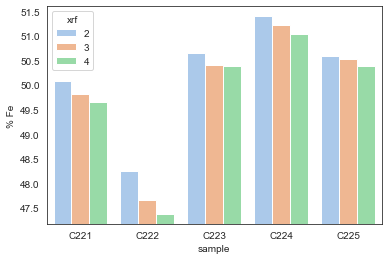

In [113]:
df = ore_by_xrf

sns.set_style('white')
g = sns.barplot(x='note',y='fe', hue='xrf', data=df, palette='pastel')
g.set_ylim(min(ore_by_xrf['fe'])-.2,max(ore_by_xrf['fe'])+.2)
g.set_xlabel("sample")
g.set_ylabel("% Fe")